In [1]:
%%capture
!unzip gemstones-shapes-imagesv2.zip

In [1]:
import sys
!{sys.executable} -m pip install scikit-learn opencv-python matplotlib tensorflow keras seaborn imbalanced-learn imgaug fastcore fastai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.2/232.2 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 82.7 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 112.8 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 1.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.9/156.9 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.3/922.3 kB 46.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.0/493.0 kB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 7.3 MB/s eta 0:00:00
     ━━━━━

In [8]:
import os
current_path = os.getcwd()
data_dir = os.path.join(current_path, "gemstones-shapes-images v2")
train_dir = os.path.join(current_path, "train")
test_dir = os.path.join(current_path, "test")

In [ ]:
import os
import shutil
import random



test_percentage = 0.2

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Iterate through each category folder
for category in os.listdir(data_dir):
    category_dir = os.path.join(data_dir, category)
    
    train_category_dir = os.path.join(train_dir, category)
    test_category_dir = os.path.join(test_dir, category)
    os.makedirs(train_category_dir, exist_ok=True)
    os.makedirs(test_category_dir, exist_ok=True)

    images = os.listdir(category_dir) 
    random.shuffle(images)
    num_test_images = int(len(images) * test_percentage)
    
    # Move images to train and test folders
    for i, image in enumerate(images):
        src_path = os.path.join(category_dir, image)
        if i < num_test_images:
            dest_path = os.path.join(test_category_dir, image)
        else:
            dest_path = os.path.join(train_category_dir, image)
        shutil.copy(src_path, dest_path)


In [14]:
Name=[]

for file in os.listdir(train_dir):
    Name+=[file]

print("The gemsstones in the dataset are \n")
print(Name)
print("\n The count of the gemstones categories: ",len(Name))

The gemsstones in the dataset are 

['bar', 'dot', 'heart', 'marquise', 'oval', 'pear', 'round', 'square', 'triangle', 'uncut']

 The count of the gemstones categories:  10


In [3]:
gems_map = dict(zip(Name, [t for t in range(len(Name))]))
print(gems_map)

{'bar': 0, 'dot': 1, 'heart': 2, 'marquise': 3, 'oval': 4, 'pear': 5, 'round': 6, 'square': 7, 'triangle': 8, 'uncut': 9}


In [9]:
import numpy as np
from random import randint
import cv2

In [10]:
img_w, img_h = 330, 330

In [6]:
def read_images():
    Images, Labels = [], []
    for root, dirs, files in os.walk(train_dir):
        f = os.path.basename(root)
        for file in files:
            try:
                image = cv2.imread(root+'/'+file)
                image = cv2.resize(image,(int(img_w), int(img_h)))
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                Images.append(image)
                Labels.append(f)
            except Exception as e:
                print(e)
    Images = np.array(Images)
    print(Images.shape)
    return (Images,Labels)

In [12]:
import numpy as np

def get_class_index(Labels):
    class_index = {name: index for index, name in enumerate(Name)}
    for i in range(len(Labels)):
        Labels[i] = class_index.get(Labels[i], -1)  # Default to -1 if class not found
    Labels = np.array(Labels)
    return Labels


In [8]:
Train_Imgs, Train_Lbls = read_images()
Train_Lbls = get_class_index(Train_Lbls)
print('Shape of train images: {}'.format(Train_Imgs.shape))
print('Shape of train labels: {}'.format(Train_Lbls.shape))

OpenCV(4.9.0) /io/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

(1416, 330, 330, 3)
Shape of train images: (1416, 330, 330, 3)
Shape of train labels: (1416,)


In [9]:
import os

def find_duplicate_files(folder):
    # Dictionary to store file names and their paths
    file_dict = {}

    # Traverse through all subfolders and files
    for root, dirs, files in os.walk(folder):
        for file in files:
            # Get the full path of the file
            file_path = os.path.join(root, file)
            
            # Check if file name already exists in the dictionary
            if file in file_dict:
                # If duplicate found, print the paths of both files
                print(f"Duplicate file found: {file}")
                print(f"  - {file_path}")
                print(f"  - {file_dict[file]}")
            else:
                # If file name is not already in dictionary, add it
                file_dict[file] = file_path


find_duplicate_files(data_dir)


In [10]:
import matplotlib.pyplot as plt

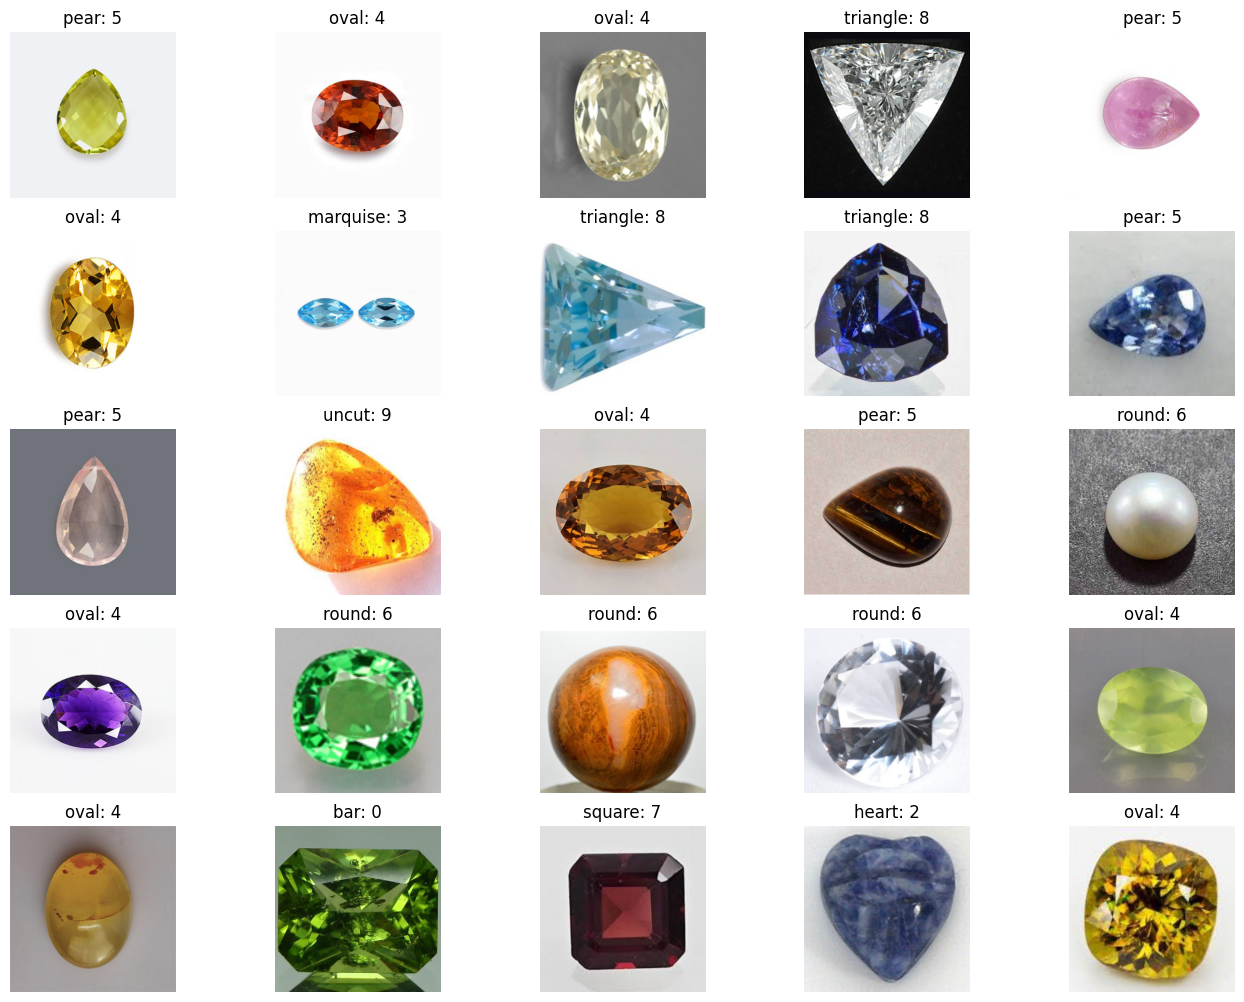

In [11]:
dim = 5

f,ax = plt.subplots(dim,dim)
f.subplots_adjust(0,0,2,2)
for i in range(0,dim):
    for j in range(0,dim):
        rnd_number = randint(0,len(Train_Imgs))
        cl = Train_Lbls[rnd_number]
        ax[i,j].imshow(Train_Imgs[rnd_number])
        ax[i,j].set_title(Name[cl]+': ' + str(cl))
        ax[i,j].axis('off')

In [12]:
def edge_and_cut(img):
    try:
        edges = cv2.Canny(img, img_w, img_h)

        if(np.count_nonzero(edges)>edges.size/10000):
            pts = np.argwhere(edges>0)
            y1,x1 = pts.min(axis=0)
            y2,x2 = pts.max(axis=0)

            new_img = img[y1:y2, x1:x2]           # crop the region
            new_img = cv2.resize(new_img,(img_w, img_h))  # Convert back
        else:
            new_img = cv2.resize(img,(img_w, img_h))

    except Exception as e:
        print(e)
        new_img = cv2.resize(img,(img_w, img_h))

    return new_img

In [13]:
def show_cropped(img):
    emb_img = img.copy()
    edges = cv2.Canny(img, img_w, img_h)

    if(np.count_nonzero(edges)>edges.size/10000):
        pts = np.argwhere(edges>0)
        y1,x1 = pts.min(axis=0)
        y2,x2 = pts.max(axis=0)

        new_img = img[y1:y2, x1:x2]

        edge_size = 1 #replace it with bigger size for larger images

        emb_img[y1-edge_size:y1+edge_size, x1:x2] = [255, 0, 0]
        emb_img[y2-edge_size:y2+edge_size, x1:x2] = [255, 0, 0]
        emb_img[y1:y2, x1-edge_size:x1+edge_size] = [255, 0, 0]
        emb_img[y1:y2, x2-edge_size:x2+edge_size] = [255, 0, 0]

        new_img = cv2.resize(new_img,(img_w, img_h))  # Convert to primary size

    else:
        new_img = cv2.resize(img,(img_w, img_h))

    fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(10, 10))
    ax[0].imshow(img, cmap='gray')
    ax[0].set_title('Original Image', fontsize=14)
    ax[1].imshow(edges, cmap='gray')
    ax[1].set_title('Canny Edges', fontsize=14)
    ax[2].imshow(emb_img, cmap='gray')
    ax[2].set_title('Bounding Box', fontsize=14)
    ax[3].imshow(new_img, cmap='gray')
    ax[3].set_title('Cropped', fontsize=14)

In [14]:
def crop_images(Imgs):
    CroppedImages = np.ndarray(shape=(len(Imgs), img_w, img_h, 3), dtype=np.int64)

    ind = 0
    for im in Imgs:
        x = edge_and_cut(im)
        CroppedImages[ind] = x
        ind += 1

    return CroppedImages

In [81]:
Train_Imgs = crop_images(Train_Imgs)
print('Final shape of images in train set: {} '.format(Train_Imgs.shape))

Final shape of images in train set: (1348, 330, 330, 3) 


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(Train_Imgs, Train_Lbls, shuffle = True, test_size = 0.2, random_state = 42)
print('Shape of X_train: {}, y_train: {} '.format(X_train.shape, y_train.shape))
print('Shape of X_val: {}, y_val: {} '.format(X_val.shape, y_val.shape))

Shape of X_train: (1132, 330, 330, 3), y_train: (1132,) 
Shape of X_val: (284, 330, 330, 3), y_val: (284,) 


In [16]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import optimizers

2024-03-21 17:56:52.398122: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-21 17:56:52.413558: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-21 17:56:53.320409: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-21 17:56:56.567698: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-21 17:56:59.662619: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

In [17]:
filters = 32      # the dimensionality of the output space
kernel_size = 3   # length of the 2D convolution window
max_pool = 2      # size of the max pooling windows

In [18]:
EPOCHS = 70                                  # while testing you can change it
batch_size = 32                              # number of training samples using in each mini batch during GD (gradient descent)
iter_per_epoch = len(X_train) // batch_size  # each sample will be passed [iter_per_epoch] times during training
val_per_epoch = len(X_val) // batch_size     # each sample will be passed [val_per_epoch] times during validation

In [19]:
model = Sequential()

# first layer
model.add(Conv2D(batch_size, (kernel_size, kernel_size), activation='relu', padding='same', input_shape=(img_w, img_h, 3))) # 32
model.add(MaxPooling2D((max_pool, max_pool))) #reduce the spatial size of incoming features

# second layer
model.add(Conv2D(2*batch_size, (kernel_size, kernel_size), activation='relu', padding='same')) # 64
model.add(MaxPooling2D((max_pool, max_pool)))

# third layer
model.add(Conv2D(4*batch_size, (kernel_size, kernel_size), activation='relu', padding='same')) # 128
model.add(MaxPooling2D((max_pool, max_pool)))

# fourth layer
model.add(Conv2D(4*batch_size, (kernel_size, kernel_size), activation='relu', padding='same')) # 128
model.add(AveragePooling2D(pool_size= (2, 2), strides= (2, 2)))

# fifth layer
model.add(Conv2D(4*batch_size, (kernel_size, kernel_size), activation='relu', padding='same')) # 128
model.add(MaxPooling2D((max_pool, max_pool)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(16*batch_size, activation='relu'))                                             # 512
model.add(Dense(87, activation='softmax'))

model.summary()

/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
2024-03-21 17:57:11.369709: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 330, 330, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 165, 165, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 165, 165, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 82, 82, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 82, 82, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 41, 41, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 41, 41, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 20, 20, 128)    │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 20, 20, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     6,554,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 87)             │        44,631 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,987,159 (26.65 MB)

 Trainable params: 6,987,159 (26.65 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(              # this is the augmentation configuration used for training
        rotation_range=25,
        zoom_range=0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.2,
        horizontal_flip=True
        )

val_datagen = ImageDataGenerator()                # for val/testing only rescaling function

In [22]:
train_gen = train_datagen.flow(X_train, y_train, batch_size=batch_size)
val_gen = val_datagen.flow(X_val, y_val, batch_size=batch_size)

In [23]:
m = model.fit(
       train_gen,
       steps_per_epoch= iter_per_epoch,
       epochs=EPOCHS,
       validation_data = val_gen,
       validation_steps = val_per_epoch,
       verbose = 1 # Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.
       )

Epoch 1/70
35/35 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.1323 - loss: 24.2226 - val_accuracy: 0.1875 - val_loss: 2.1306
Epoch 2/70
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1562 - loss: 1.0390 - val_accuracy: 0.2143 - val_loss: 1.1299
Epoch 3/70
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.2571 - loss: 2.1407 - val_accuracy: 0.2695 - val_loss: 2.0495
Epoch 4/70
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2188 - loss: 1.0737 - val_accuracy: 0.2143 - val_loss: 1.1595
Epoch 5/70
35/35 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.2337 - loss: 2.1532 - val_accuracy: 0.3047 - val_loss: 1.9961
Epoch 6/70
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3125 - loss: 1.0473 - val_accuracy: 0.3214 - val_loss: 1.0732
Epoch 7/70
35/35 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.2595 - loss: 2.161

/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-03-21 17:58:07.974549: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-03-21 17:58:08.280148: W tensorflow/core/framework/local_rendezvous.cc

In [24]:
import matplotlib.pyplot as plt

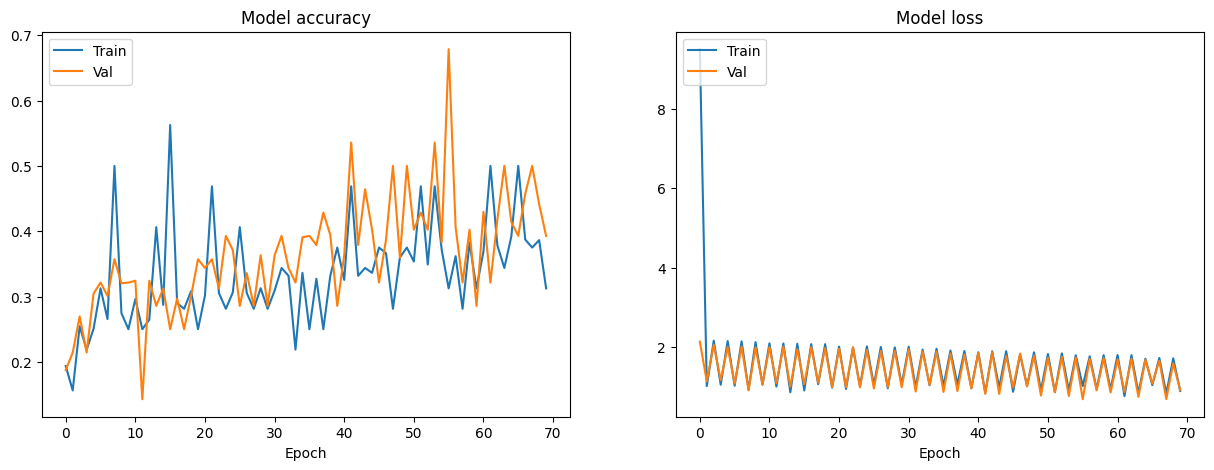

In [25]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
axs[0].plot(m.history['accuracy'])
axs[0].plot(m.history['val_accuracy'])
axs[0].set_title('Model accuracy')
axs[0].legend(['Train', 'Val'], loc='upper left')

axs[1].plot(m.history['loss'])
axs[1].plot(m.history['val_loss'])
axs[1].set_title('Model loss')
axs[1].legend(['Train', 'Val'], loc='upper left')

for ax in axs.flat:
    ax.set(xlabel='Epoch')

In [26]:
score = model.evaluate(val_gen, steps= len(val_gen))

for idx, metric in enumerate(model.metrics_names):
    print('{}:{}'.format(metric, score[idx]))

9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 330ms/step - accuracy: 0.3682 - loss: 1.7132
loss:1.6246213912963867
compile_metrics:0.4225352108478546


9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 330ms/step


<Axes: >

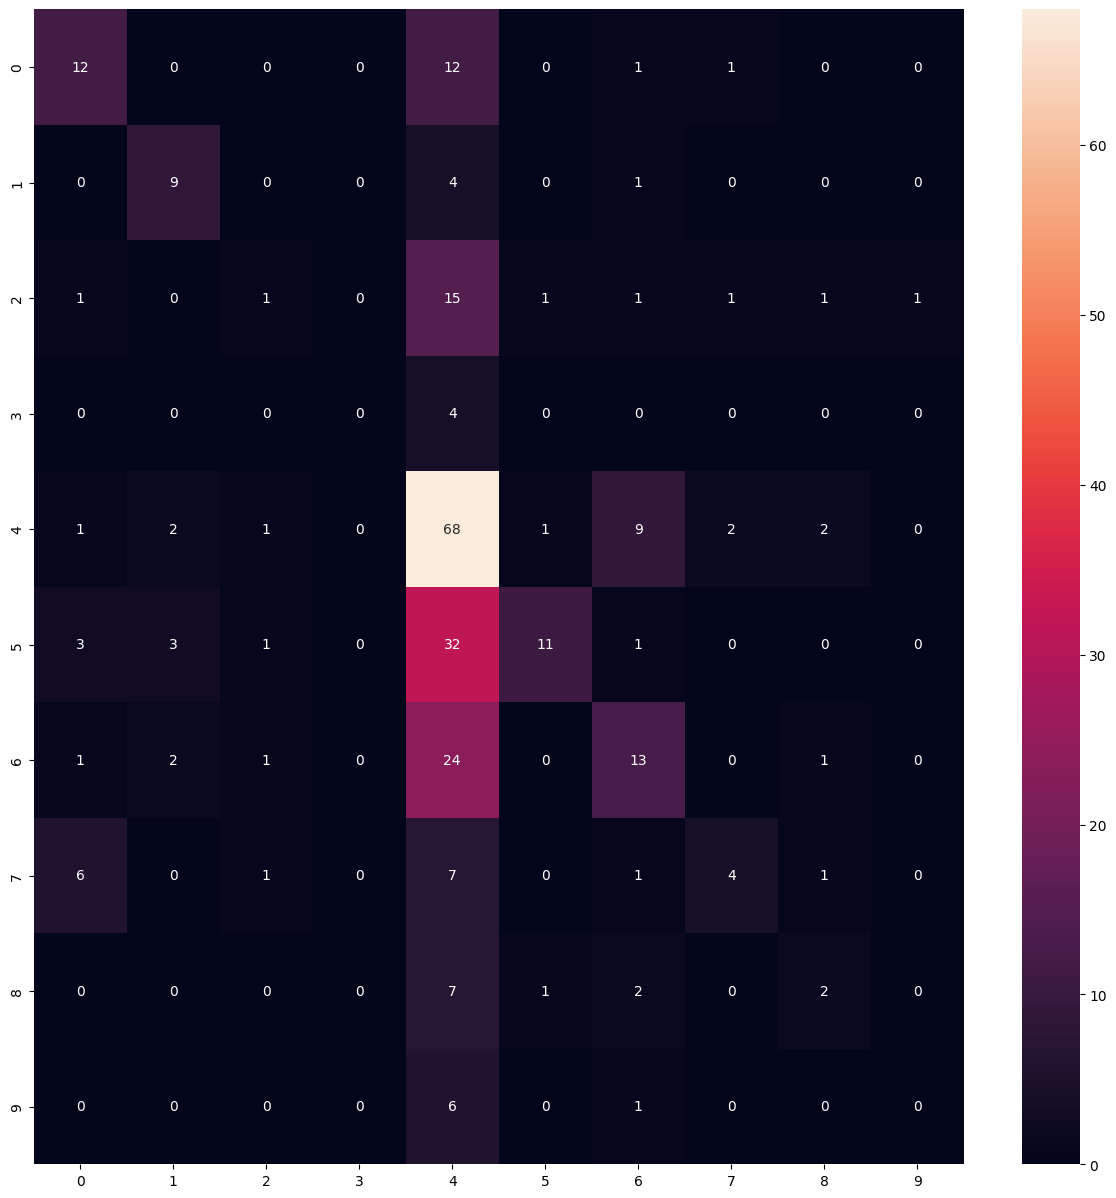

In [27]:
import seaborn as sn
from sklearn.metrics import confusion_matrix
y_pre_test=model.predict(X_val)
y_pre_test=np.argmax(y_pre_test,axis=1)
cm=confusion_matrix(y_val,y_pre_test)

plt.figure(figsize = (15,15))
sn.heatmap(cm, annot=True)

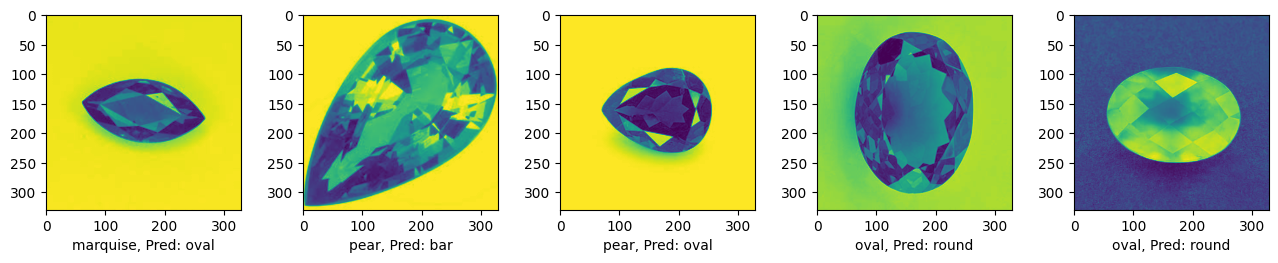

In [28]:
x=(y_pre_test-y_val!=0).tolist()
x=[i for i,l in enumerate(x) if l!=False]

fig,ax=plt.subplots(1,5,sharey=False,figsize=(13,13))
fig.tight_layout()

for i in range(5):
    ax[i].imshow(X_val[x[i]][:,:,1])
    ax[i].set_xlabel('{}, Pred: {}'.format(Name[y_val[x[i]]],Name[y_pre_test[x[i]]]))

In [29]:
model.save('model_gemshapes.h5')

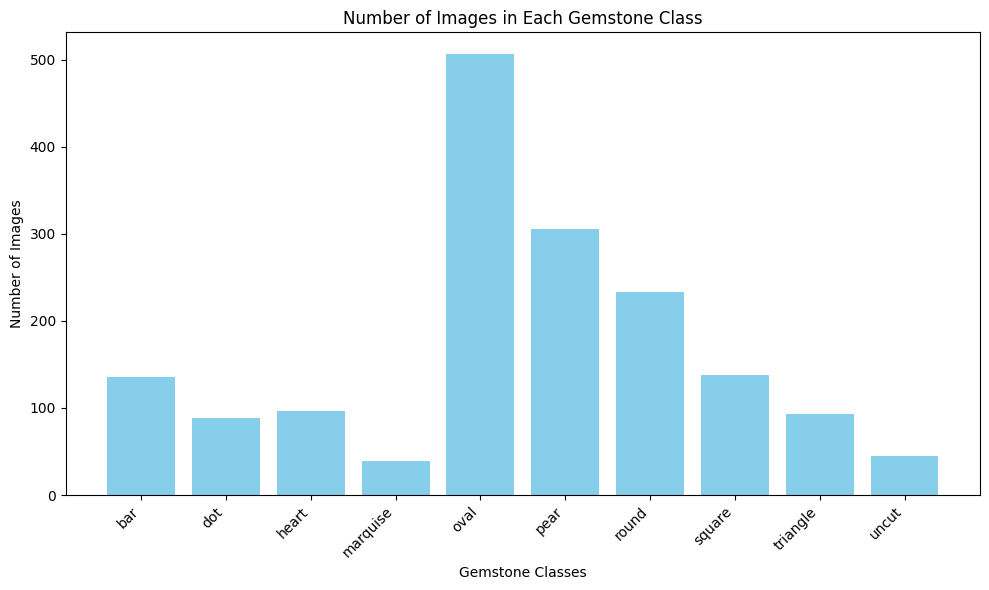

In [30]:
import os
import matplotlib.pyplot as plt

class_counts = {}

# Count the number of images in each class
for category in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, category)
    class_counts[category] = len(os.listdir(class_dir))

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xlabel('Gemstone Classes')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Gemstone Class')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


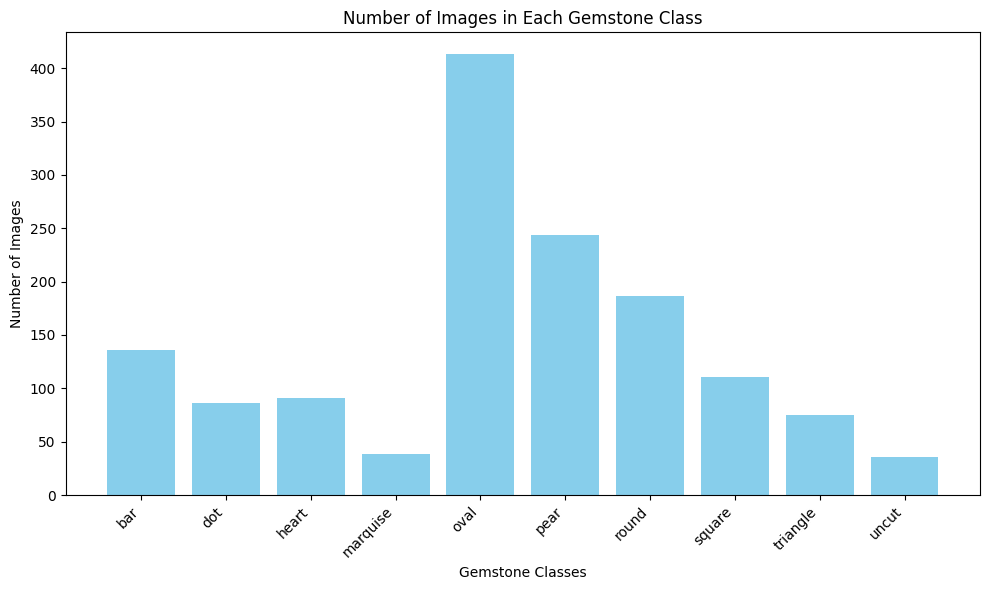

In [31]:
class_counts = {}

# Count the number of images in each class
for category in os.listdir(train_dir):
    class_dir = os.path.join(train_dir, category)
    class_counts[category] = len(os.listdir(class_dir))

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xlabel('Gemstone Classes')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Gemstone Class')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [32]:
from imblearn.over_sampling import RandomOverSampler
import numpy as np

original_shape = X_train.shape

ros = RandomOverSampler(random_state=42)
X_train_r = np.reshape(X_train, (len(X_train), -1))

X_train_resampled, y_train_resampled = ros.fit_resample(X_train_r, y_train)
X_train_resampled = X_train_resampled.reshape(len(X_train_resampled), original_shape[1], original_shape[2], original_shape[3])

unique, counts = np.unique(y_train_resampled, return_counts=True)
class_counts_resampled = dict(zip(unique, counts))
print("Class distribution after over-sampling:", class_counts_resampled)


Class distribution after over-sampling: {0: 327, 1: 327, 2: 327, 3: 327, 4: 327, 5: 327, 6: 327, 7: 327, 8: 327, 9: 327}


In [33]:
print('Shape of X_train: {}, y_train: {} '.format(X_train_resampled.shape, y_train_resampled.shape))
print('Shape of X_val: {}, y_val: {} '.format(X_val.shape, y_val.shape))

Shape of X_train: (3270, 330, 330, 3), y_train: (3270,) 
Shape of X_val: (284, 330, 330, 3), y_val: (284,) 


In [34]:
train_gen = train_datagen.flow(X_train_resampled, y_train_resampled, batch_size=batch_size)
val_gen = val_datagen.flow(X_val, y_val, batch_size=batch_size)

In [35]:
upsampled_model = model.fit(
       train_gen,
       steps_per_epoch= iter_per_epoch,
       epochs=EPOCHS,
       validation_data = val_gen,
       validation_steps = val_per_epoch,
       verbose = 1 # Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.
       )

Epoch 1/70
35/35 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.2748 - loss: 1.9192 - val_accuracy: 0.3359 - val_loss: 1.8009
Epoch 2/70
35/35 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.3714 - loss: 1.7648 - val_accuracy: 0.2143 - val_loss: 0.9617
Epoch 3/70
35/35 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.4020 - loss: 1.7059 - val_accuracy: 0.2617 - val_loss: 2.0041
Epoch 4/70
35/35 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.4210 - loss: 1.6911 - val_accuracy: 0.4643 - val_loss: 0.8957
Epoch 5/70
35/35 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.4380 - loss: 1.6917 - val_accuracy: 0.3086 - val_loss: 1.8784
Epoch 6/70
35/35 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.4283 - loss: 1.6394 - val_accuracy: 0.4643 - val_loss: 0.8354
Epoch 7/70
35/35 ━━━━━━━━━━━━━━━━━━━━ 108s 1s/step - accuracy:

/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-03-21 18:31:43.623761: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-03-21 18:32:27.202919: W tensorflow/core/framework/local_rendezvous.cc

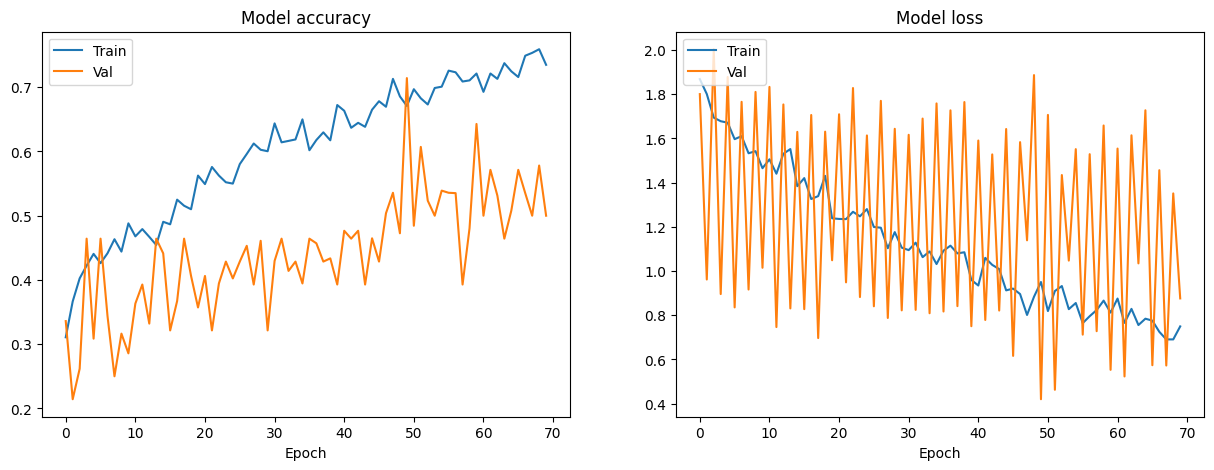

In [36]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
axs[0].plot(upsampled_model.history['accuracy'])
axs[0].plot(upsampled_model.history['val_accuracy'])
axs[0].set_title('Model accuracy')
axs[0].legend(['Train', 'Val'], loc='upper left')

axs[1].plot(upsampled_model.history['loss'])
axs[1].plot(upsampled_model.history['val_loss'])
axs[1].set_title('Model loss')
axs[1].legend(['Train', 'Val'], loc='upper left')

for ax in axs.flat:
    ax.set(xlabel='Epoch')

In [37]:
score = model.evaluate(val_gen, steps= len(val_gen))

for idx, metric in enumerate(model.metrics_names):
    print('{}:{}'.format(metric, score[idx]))

9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 330ms/step - accuracy: 0.4742 - loss: 1.6297
loss:1.54080331325531
compile_metrics:0.5105633735656738


9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 325ms/step


<Axes: >

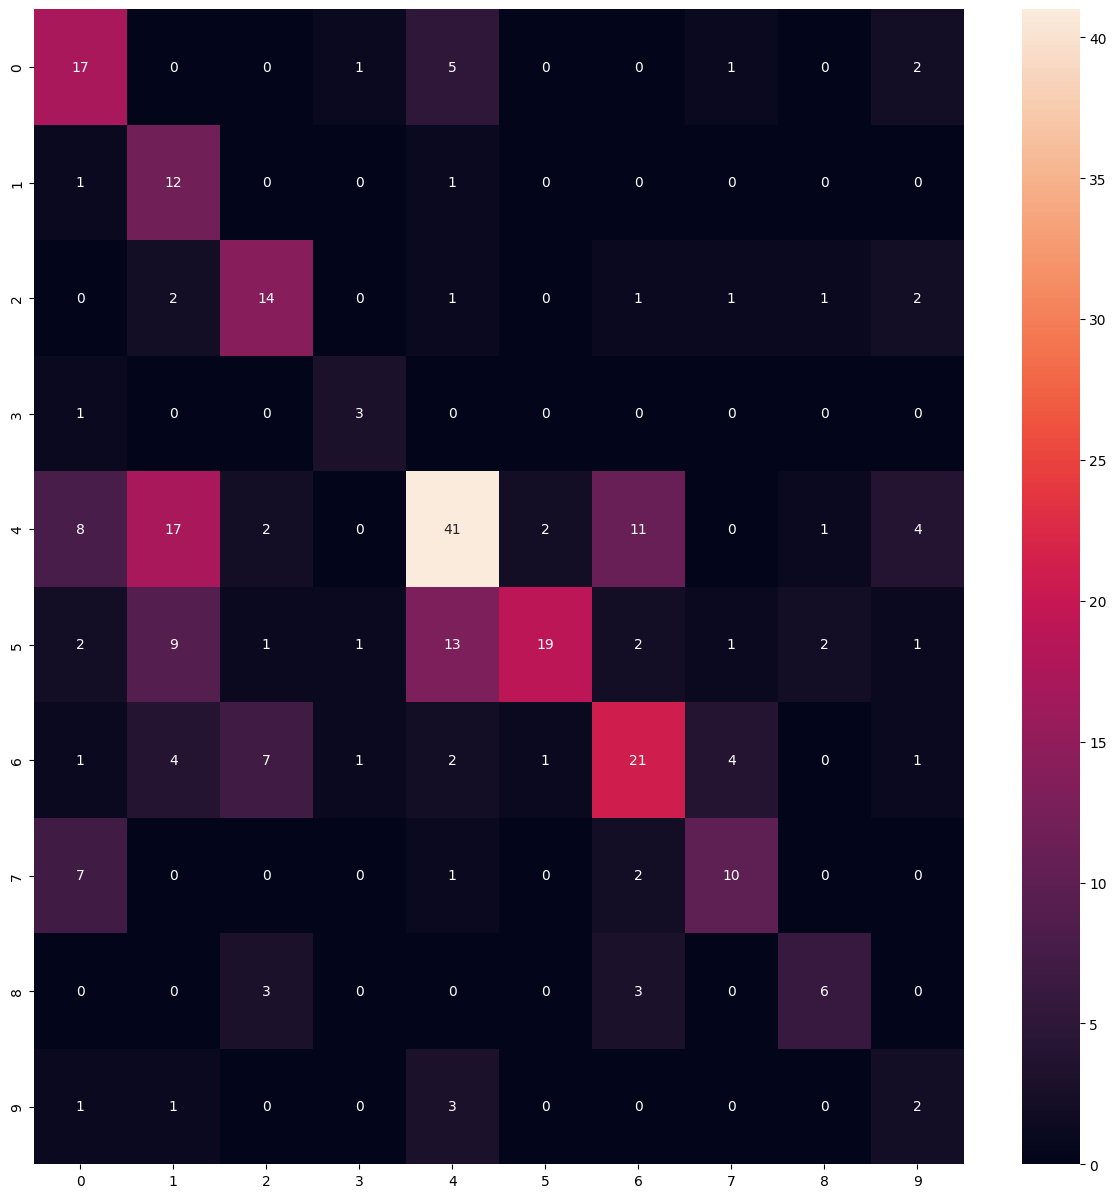

In [38]:
import seaborn as sn
from sklearn.metrics import confusion_matrix
y_pre_test=model.predict(X_val)
y_pre_test=np.argmax(y_pre_test,axis=1)
cm=confusion_matrix(y_val,y_pre_test)

plt.figure(figsize = (15,15))
sn.heatmap(cm, annot=True)

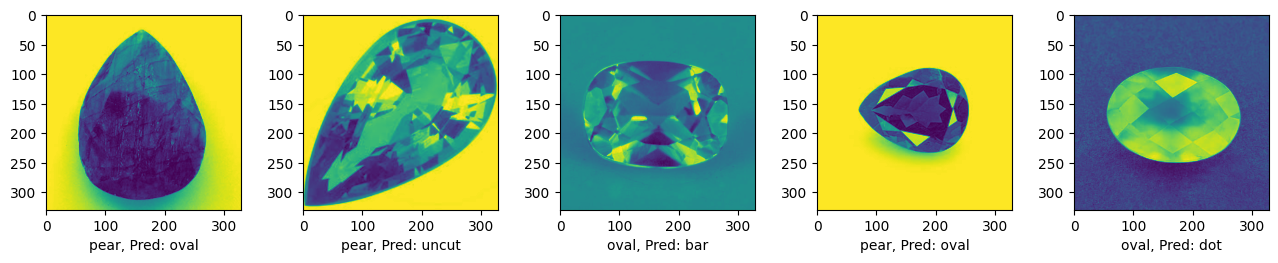

In [39]:
x=(y_pre_test-y_val!=0).tolist()
x=[i for i,l in enumerate(x) if l!=False]

fig,ax=plt.subplots(1,5,sharey=False,figsize=(13,13))
fig.tight_layout()

for i in range(5):
    ax[i].imshow(X_val[x[i]][:,:,1])
    ax[i].set_xlabel('{}, Pred: {}'.format(Name[y_val[x[i]]],Name[y_pre_test[x[i]]]))

In [40]:
model.save('model_gemshapes_upsampled.h5')

In [107]:
%%capture
!unzip gemstones-shapes-imagesv2.zip

In [ ]:
current_path = os.getcwd()
data_dir = os.path.join(current_path, "gemstones-shapes-images v2")

In [ ]:
import os
import matplotlib.pyplot as plt

class_counts = {}

# Count the number of images in each class
for category in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, category)
    class_counts[category] = len(os.listdir(class_dir))

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xlabel('Gemstone Classes')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Gemstone Class')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [47]:
X_train.shape

(1132, 330, 330, 3)

In [56]:
from imblearn.under_sampling import RandomUnderSampler
import numpy as np

original_shape = X_train.shape

rus = RandomUnderSampler(random_state=42)
X_train_r = np.reshape(X_train, (len(X_train), -1))

X_train_resampled, y_train_resampled = rus.fit_resample(X_train_r, y_train)
X_train_resampled = X_train_resampled.reshape(len(X_train_resampled), original_shape[1], original_shape[2], original_shape[3])

unique, counts = np.unique(y_train_resampled, return_counts=True)
class_counts_resampled = dict(zip(unique, counts))
print("Class distribution after under-sampling:", class_counts_resampled)


Class distribution after under-sampling: {0: 29, 1: 29, 2: 29, 3: 29, 4: 29, 5: 29, 6: 29, 7: 29, 8: 29, 9: 29}


In [57]:
train_gen = train_datagen.flow(X_train_resampled, y_train_resampled, batch_size=batch_size)
val_gen = val_datagen.flow(X_val, y_val, batch_size=batch_size)

In [58]:
downsampled_model = model.fit(
       train_gen,
       steps_per_epoch= iter_per_epoch,
       epochs=EPOCHS,
       validation_data = val_gen,
       validation_steps = val_per_epoch,
       verbose = 1 # Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.
       )

Epoch 1/70
35/35 ━━━━━━━━━━━━━━━━━━━━ 17s 362ms/step - accuracy: 0.6647 - loss: 0.8210 - val_accuracy: 0.5430 - val_loss: 1.4703
Epoch 2/70
35/35 ━━━━━━━━━━━━━━━━━━━━ 15s 286ms/step - accuracy: 0.7487 - loss: 0.7152 - val_accuracy: 0.5000 - val_loss: 0.8798
Epoch 3/70
35/35 ━━━━━━━━━━━━━━━━━━━━ 17s 357ms/step - accuracy: 0.7056 - loss: 0.6677 - val_accuracy: 0.5039 - val_loss: 1.6534
Epoch 4/70
35/35 ━━━━━━━━━━━━━━━━━━━━ 18s 285ms/step - accuracy: 0.7601 - loss: 0.6087 - val_accuracy: 0.5000 - val_loss: 0.6407
Epoch 5/70
35/35 ━━━━━━━━━━━━━━━━━━━━ 18s 364ms/step - accuracy: 0.7242 - loss: 0.7110 - val_accuracy: 0.4922 - val_loss: 1.7034
Epoch 6/70
35/35 ━━━━━━━━━━━━━━━━━━━━ 15s 288ms/step - accuracy: 0.7740 - loss: 0.7132 - val_accuracy: 0.5000 - val_loss: 0.9282
Epoch 7/70
35/35 ━━━━━━━━━━━━━━━━━━━

/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-03-21 20:45:25.894216: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-03-21 20:45:42.966197: W tensorflow/core/framework/local_rendezvous.cc

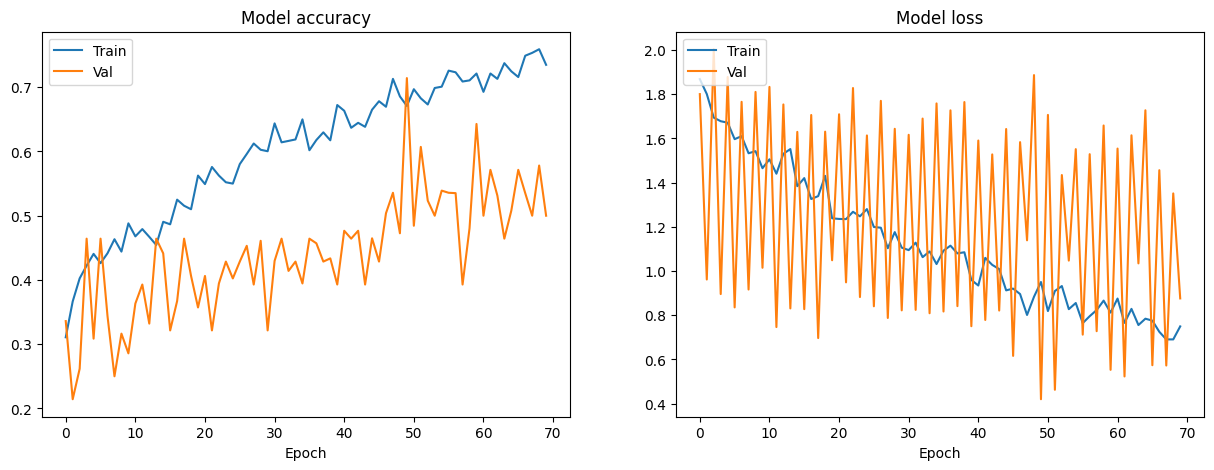

In [60]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
axs[0].plot(upsampled_model.history['accuracy'])
axs[0].plot(upsampled_model.history['val_accuracy'])
axs[0].set_title('Model accuracy')
axs[0].legend(['Train', 'Val'], loc='upper left')

axs[1].plot(upsampled_model.history['loss'])
axs[1].plot(upsampled_model.history['val_loss'])
axs[1].set_title('Model loss')
axs[1].legend(['Train', 'Val'], loc='upper left')

for ax in axs.flat:
    ax.set(xlabel='Epoch')

In [61]:
score = model.evaluate(val_gen, steps= len(val_gen))

for idx, metric in enumerate(model.metrics_names):
    print('{}:{}'.format(metric, score[idx]))

9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 335ms/step - accuracy: 0.4088 - loss: 2.6310
loss:2.4284579753875732
compile_metrics:0.4260563254356384


9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 329ms/step


<Axes: >

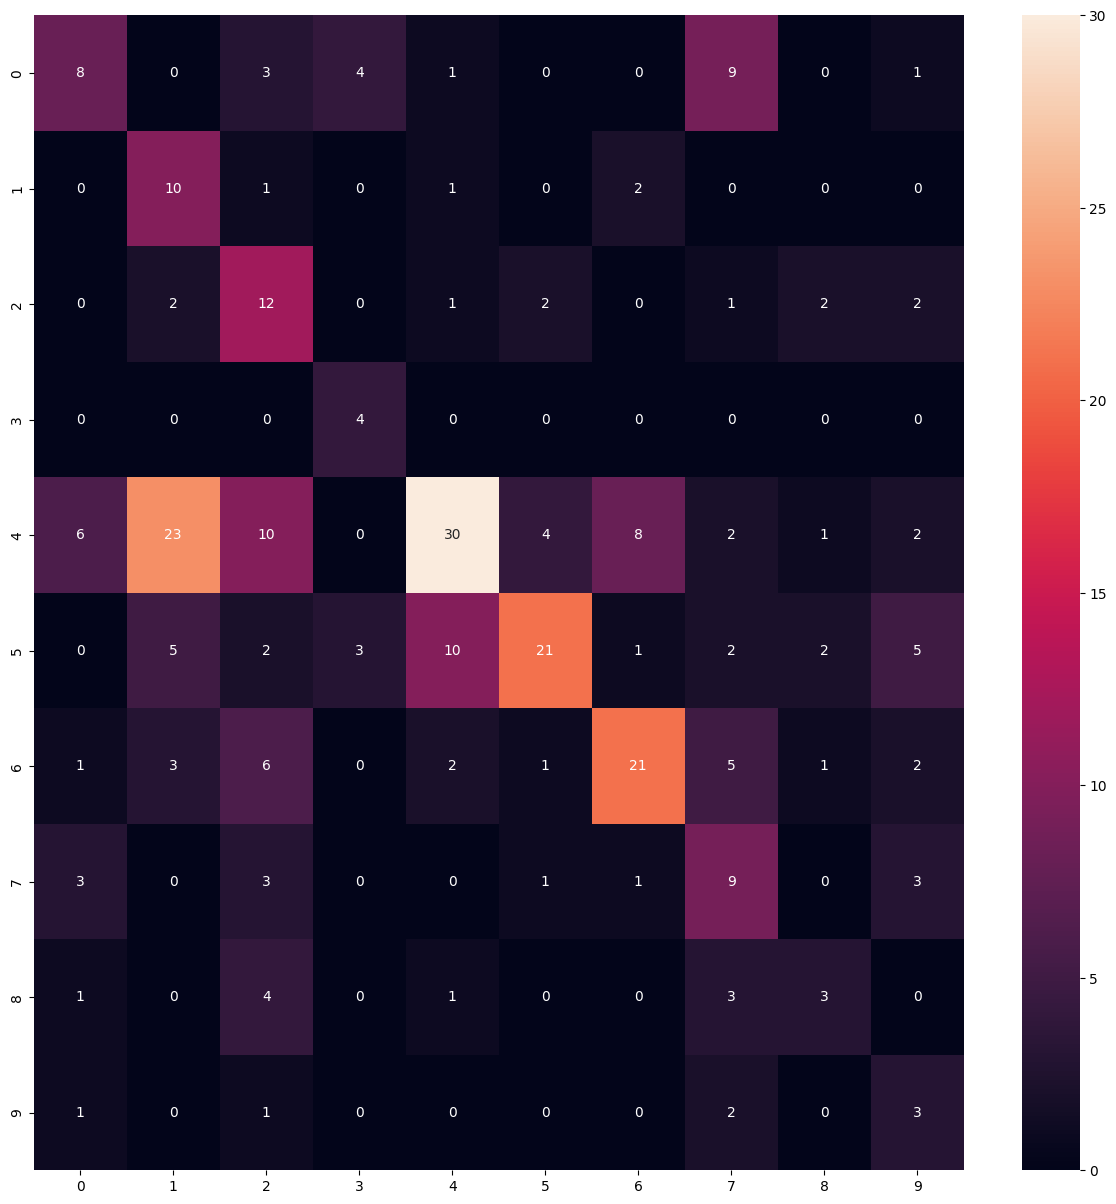

In [62]:
import seaborn as sn
from sklearn.metrics import confusion_matrix
y_pre_test=model.predict(X_val)
y_pre_test=np.argmax(y_pre_test,axis=1)
cm=confusion_matrix(y_val,y_pre_test)

plt.figure(figsize = (15,15))
sn.heatmap(cm, annot=True)

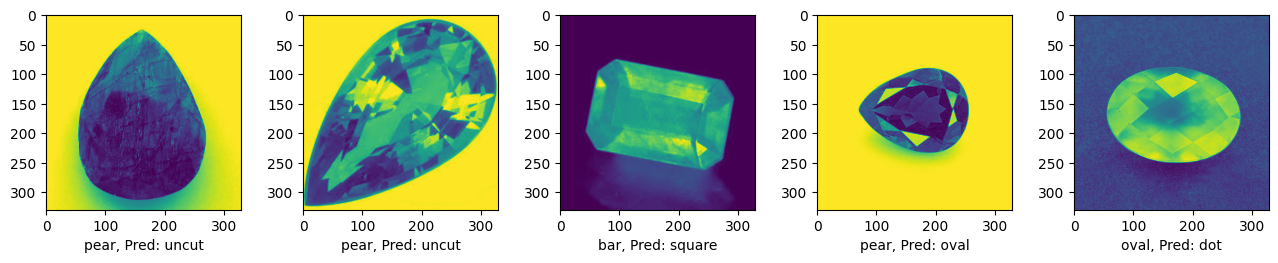

In [63]:
x=(y_pre_test-y_val!=0).tolist()
x=[i for i,l in enumerate(x) if l!=False]

fig,ax=plt.subplots(1,5,sharey=False,figsize=(13,13))
fig.tight_layout()

for i in range(5):
    ax[i].imshow(X_val[x[i]][:,:,1])
    ax[i].set_xlabel('{}, Pred: {}'.format(Name[y_val[x[i]]],Name[y_pre_test[x[i]]]))

In [64]:
model.save('model_gemshapes_downsampled.h5')

In [7]:
def read_test_images():
    Images, Labels = [], []
    for root, dirs, files in os.walk(test_dir):
        f = os.path.basename(root)
        for file in files:
            try:
                image = cv2.imread(root+'/'+file)
                image = cv2.resize(image,(int(img_w), int(img_h)))
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                Images.append(image)
                Labels.append(f)
            except Exception as e:
                print(e)
    Images = np.array(Images)
    print(Images.shape)
    return (Images,Labels)

In [15]:
Test_Imgs, Test_Lbls = read_test_images()
Test_Lbls = get_class_index(Test_Lbls)
print('Shape of train images: {}'.format(Test_Imgs.shape))
print('Shape of train labels: {}'.format(Test_Lbls.shape))

OpenCV(4.9.0) /io/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

(472, 330, 330, 3)
Shape of train images: (472, 330, 330, 3)
Shape of train labels: (472,)


In [24]:
import tensorflow as tf

model_paths = ['model_gemshapes.h5', 'model_gemshapes_downsampled.h5', 'model_gemshapes_upsampled.h5']
model_names = ["Gem Shape", "Downsampled", "Upsampled"]
models = [tf.keras.models.load_model(path) for path in model_paths]

for i, model in enumerate(models):
    predictions = model.predict(Test_Imgs, verbose=0)
    predicted_labels = tf.argmax(predictions, axis=1)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted_labels, Test_Lbls), tf.float32)) * 100
    print(f"{model_names[i]} Model : Accuracy: {accuracy:.2f}%")


Gem Shape Model : Accuracy: 48.52%
Downsampled Model : Accuracy: 49.58%
Upsampled Model : Accuracy: 61.65%


In [2]:
from fastcore.all import *
from fastai.vision.all import *
import fastai.torch_core as core
import numpy as np
import pandas as pd
core.set_seed(42,True)

Total sample count:1416


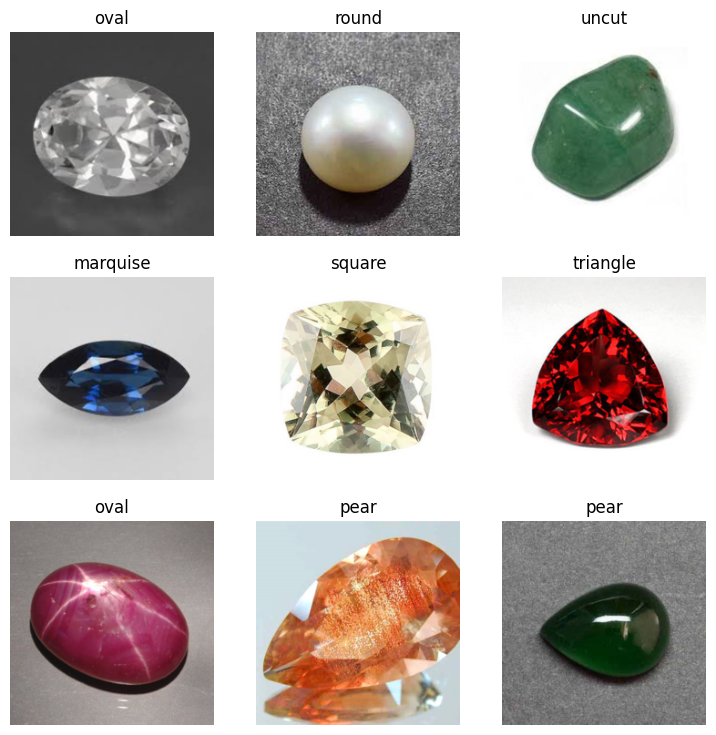

In [3]:
dls = ImageDataLoaders.from_folder("./gem-dataset", valid="test", seed=42, item_tfms=Resize(224))
dls.valid_ds.items[:3]
dls.show_batch()
print("Total sample count:" + str(dls.n))

In [5]:
learn = vision_learner(dls, resnet101, metrics=[accuracy, top_k_accuracy])
learn.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,top_k_accuracy,time
0,2.847183,1.105109,0.627119,0.951271,05:57


epoch,train_loss,valid_loss,accuracy,top_k_accuracy,time
0,1.343767,0.770959,0.752119,0.970339,07:54
1,0.977328,0.637143,0.802966,0.978814,07:53
2,0.694272,0.515635,0.830508,0.987288,07:55
3,0.475634,0.479206,0.838983,0.987288,07:54
4,0.341668,0.454799,0.858051,0.987288,07:54


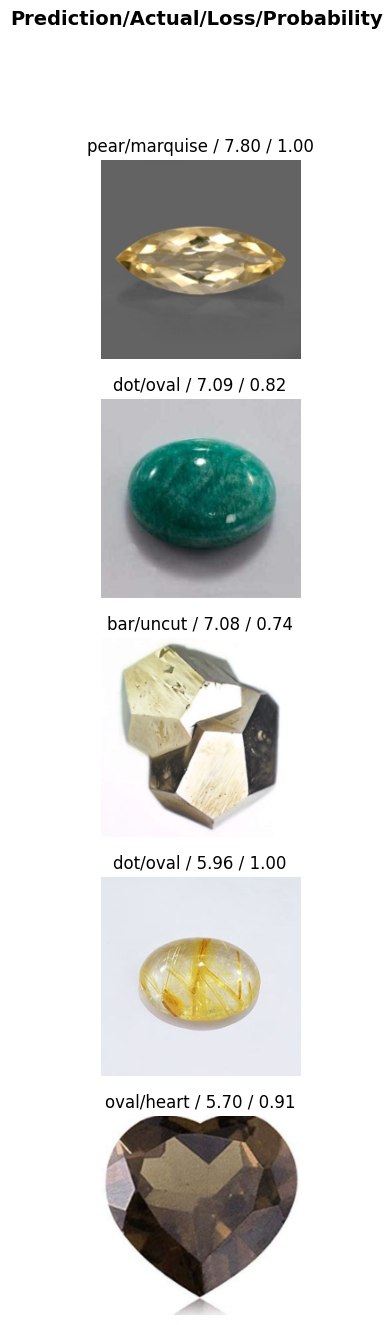

In [6]:
interpretation = ClassificationInterpretation.from_learner(learn)
interpretation.plot_top_losses(5, nrows=5)

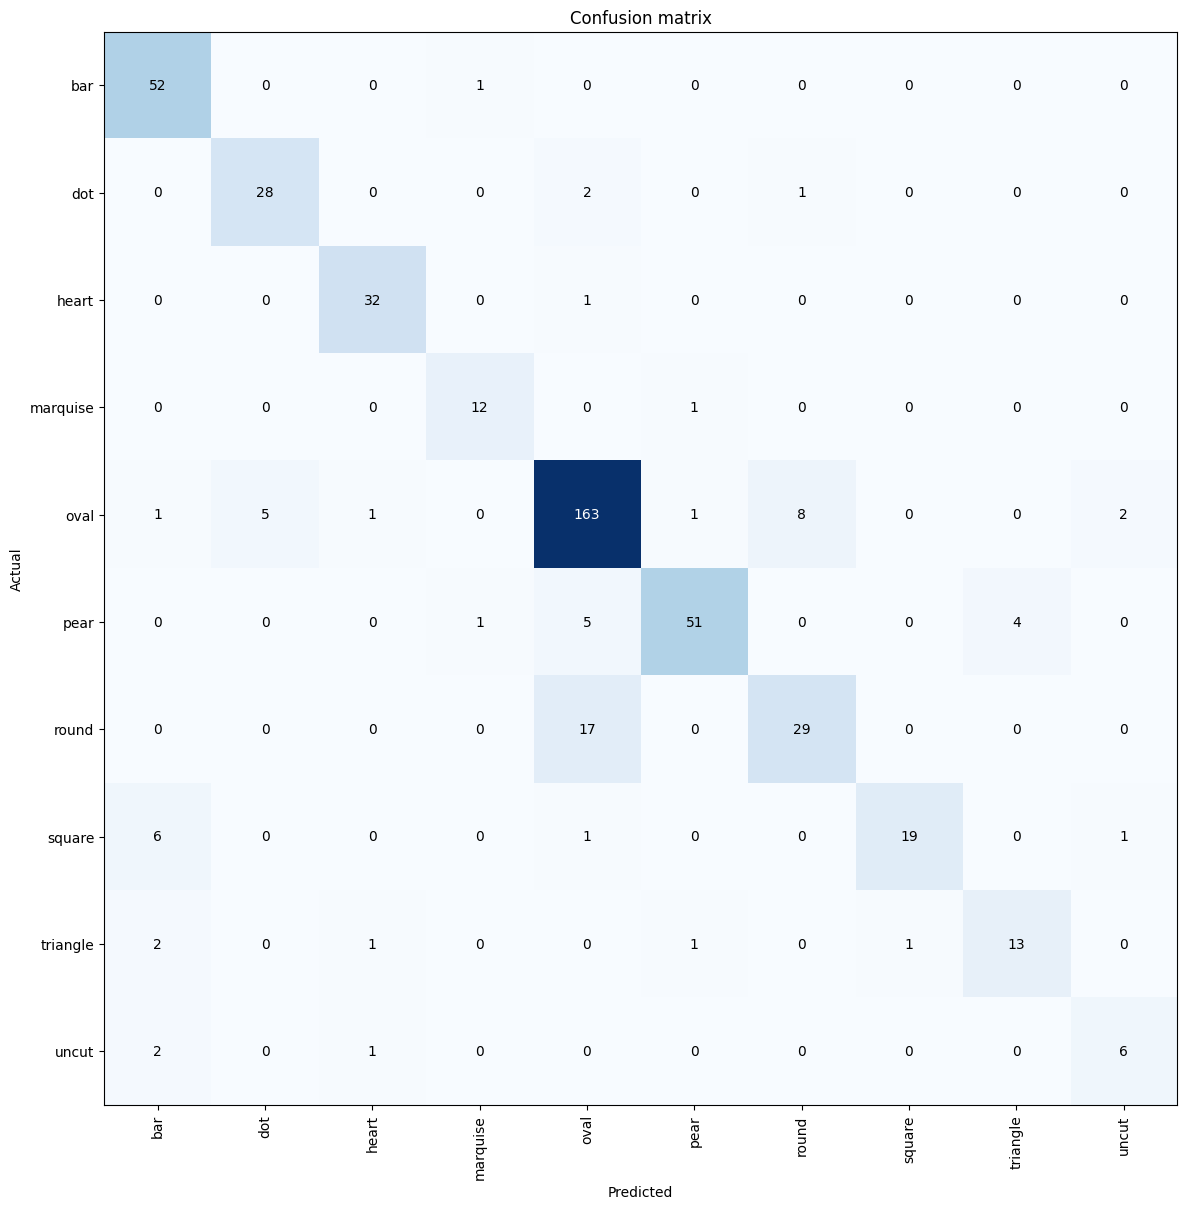

In [7]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12, 12))

In [8]:
learn.export(fname="fastai_shape.h5")

In [9]:
import tensorflow as tf

model = load_learner('fastai_shape.h5', cpu=False)

test_results = model.validate(dl=dls.valid)

# Get the accuracy from the test results
test_accuracy = test_results[1]
print(f"Test Accuracy: {test_accuracy*100:.4f}I%")

2024-04-01 10:40:26.955470: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-01 10:40:31.954186: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-01 10:40:35.433626: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Test Accuracy: 85.8051I%
